In [20]:
import os
import sys
sys.path.append('../Prelim_Stats')
import config
import numpy as np
import xarray as xr
import pyproj
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
from scipy.stats import probplot
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import multivariate_normal
from pyproj import Transformer
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import pyproj

In [21]:
from pyextremes import get_extremes, get_return_periods
from pyextremes.plotting import plot_extremes
from closest_grid_cell import select_nearest_grid_cell
from pyextremes import EVA
import xarray as xr
import matplotlib.pyplot as plt

In [22]:
from major_return_levels_bm import get_extreme_return_levels_bm
from pyextremes import get_extremes, get_return_periods, EVA

In [1]:
#Files of different regions 

In [9]:
regions_sourcefile= xr.open_dataset("regions_CH2018_all_EUR-11.nc")

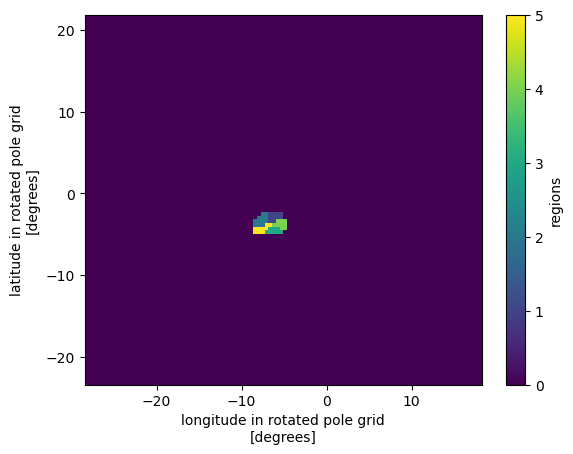

In [10]:
regions_sourcefile["regions"]. plot()

In [23]:
target_ds = xr.open_dataset(f"{config.MODELS_DIR}/temp_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/temp_r01_coarse_masked.nc")

src_rlat = regions_sourcefile["rlat"].values
src_rlon = regions_sourcefile["rlon"].values
src_mask = regions_sourcefile["regions"].values

tgt_lat = target_ds["lat"].values
tgt_lon = target_ds["lon"].values

In [30]:
# Set up transformer: regular lat/lon -> rotated lat/lon
rotpole = regions_sourcefile['rotated_pole'].attrs
pole_lat = rotpole['grid_north_pole_latitude']
pole_lon = rotpole['grid_north_pole_longitude']
transformer = pyproj.Transformer.from_proj(
    pyproj.Proj(proj='latlong', datum='WGS84'),
    pyproj.Proj(proj='ob_tran', o_proj='latlon', o_lat_p=pole_lat, o_lon_p=pole_lon)
)

In [29]:
def find_nearest(arr, val):
    return np.abs(arr - val).argmin()

mask_on_target = np.zeros((len(tgt_lat), len(tgt_lon)), dtype=src_mask.dtype)
for i, lat in enumerate(tgt_lat):
    for j, lon in enumerate(tgt_lon):
        # pyproj expects lon, lat order!
        rlon, rlat = transformer.transform(lon, lat)
        ilat = find_nearest(src_rlat, rlat)
        ilon = find_nearest(src_rlon, rlon)
        mask_on_target[i, j] = src_mask[ilat, ilon]

new_mask = xr.DataArray(mask_on_target, coords={"lat": tgt_lat, "lon": tgt_lon}, dims=["lat", "lon"])

ValueError: operands could not be broadcast together with shapes (412,) (33,) 

In [ ]:


regions_sourcefile = xr.open_dataset("regions_CH2018_all_EUR-11.nc")
target_ds = xr.open_dataset(f"{config.MODELS_DIR}/temp_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/temp_r01_coarse_masked.nc")

src_rlat = regions_sourcefile["rlat"].values
src_rlon = regions_sourcefile["rlon"].values
src_mask = regions_sourcefile["regions"].values

tgt_lat = target_ds["lat"].values
tgt_lon = target_ds["lon"].values

# Set up transformer: regular lat/lon -> rotated lat/lon
rotpole = regions_sourcefile.attrs['rotated_pole']
pole_lat = rotpole['grid_north_pole_latitude']
pole_lon = rotpole['grid_north_pole_longitude']
transformer = pyproj.Transformer.from_proj(
    pyproj.Proj(proj='latlong', datum='WGS84'),
    pyproj.Proj(proj='ob_tran', o_proj='latlon', o_lat_p=pole_lat, o_lon_p=pole_lon)
)

def find_nearest(arr, val):
    return np.abs(arr - val).argmin()

mask_on_target = np.zeros((len(tgt_lat), len(tgt_lon)), dtype=src_mask.dtype)
for i, lat in enumerate(tgt_lat):
    for j, lon in enumerate(tgt_lon):
        rlat, rlon = transformer.transform(lat, lon)
        ilat = find_nearest(src_rlat, rlat)
        ilon = find_nearest(src_rlon, rlon)
        mask_on_target[i, j] = src_mask[ilat, ilon]

new_mask = xr.DataArray(mask_on_target, coords={"lat": tgt_lat, "lon": tgt_lon}, dims=["lat", "lon"])

LOCARNO

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Example data
cities = [
    {"name": "Locarno", "lat": 46.1709, "lon": 8.7995, "bias": 12.3},
    {"name": "Zurich", "lat": 47.3769, "lon": 8.5417, "bias": 5.6},
    {"name": "Lugano", "lat": 46.0037, "lon": 8.9511, "bias": 8.1},
    {"name": "Bern", "lat": 46.9480, "lon": 7.4474, "bias": 3.2},
]

Precipitation

In [8]:
return_periods = [5, 10, 20, 50, 100]

obs_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.TARGET_DIR}/RhiresD_1971_2023.nc",
    variable_name="RhiresD",
    lat=46.1709,
    lon=8.7995,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

coarse_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.MODELS_DIR}/precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/precip_r01_coarse_masked.nc",
    variable_name="precip",
    lat=46.1709,
    lon=8.7995,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

eqm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/precip_BC_bicubic_r01.nc",
    variable_name="precip",
    lat=46.1709,
    lon=8.7995,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

eqm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/DOWNSCALED_TRAINING_QM_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.1709,
    lon=8.7995,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

dotc_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/precip_temp_tmin_tmax_bicubic_r01.nc",
    variable_name="precip",
    lat=46.1709,
    lon=8.7995,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

dotc_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/DOWNSCALED_TRAINING_DOTC_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.1709,
    lon=8.7995,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

qdm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/precip_BC_bicubic_r01.nc",
    variable_name="precip",
    lat=46.1709,
    lon=8.7995,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

qdm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/DOWNSCALED_TRAINING_QDM_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.1709,
    lon=8.7995,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

baselines = {
    "COARSE": coarse_rl,
    "EQM": eqm_rl,
    "EQM_UNET": eqm_unet_rl,
    "DOTC": dotc_rl,
    "DOTC_UNET": dotc_unet_rl,
    "QDM": qdm_rl,
    "QDM_UNET": qdm_unet_rl
}

bias_table = pd.DataFrame(index=return_periods)
for name, rl in baselines.items():
    bias_table[name] = rl - obs_rl

print("Bias (Model - Obs) for each return period (Block Maxima) for daily precip for Locarno:")
print(bias_table)

Target: (46.1709, 8.7995)
Closest grid cell: (46.1737, 8.8048)
Distance: 0.0060 degrees
Grid indices: lat_idx=50, lon_idx=231
Variable 'RhiresD' extracted
Time series shape: (10957,)
Data range: -0.00 to 270.14
Target: (46.1709, 8.7995)
Closest grid cell: (46.1639, 8.8693)
Distance: 0.0701 degrees
Grid indices: lat_idx=4, lon_idx=21
Variable 'precip' extracted
Time series shape: (10957,)
Data range: -0.20 to 272.01
Target: (46.1709, 8.7995)
Closest grid cell: (46.1737, 8.8048)
Distance: 0.0060 degrees
Grid indices: lat_idx=50, lon_idx=231
Variable 'precip' extracted
Time series shape: (10957,)
Data range: -0.25 to 265.47
Target: (46.1709, 8.7995)
Closest grid cell: (46.1737, 8.8048)
Distance: 0.0060 degrees
Grid indices: lat_idx=50, lon_idx=231
Variable 'precip' extracted
Time series shape: (10957,)
Data range: 0.00 to 264.85
Target: (46.1709, 8.7995)
Closest grid cell: (46.1737, 8.8048)
Distance: 0.0060 degrees
Grid indices: lat_idx=50, lon_idx=231
Variable 'precip' extracted
Time ser

temperature

In [9]:
return_periods = [5, 10, 20, 50, 100]

# Get return levels for observations and each baseline
obs_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.TARGET_DIR}/TmaxD_1971_2023.nc",
    variable_name="TmaxD",
    lat=46.1709,
    lon=8.7995,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

coarse_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.MODELS_DIR}/tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/tmax_r01_coarse_masked.nc",
    variable_name="tmax",
    lat=46.1709,
    lon=8.7995,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

eqm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/tmax_BC_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.1709,
    lon=8.7995,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

eqm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/DOWNSCALED_TRAINING_QM_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.1709,
    lon=8.7995,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

dotc_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/precip_temp_tmin_tmax_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.1709,
    lon=8.7995,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

dotc_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/DOWNSCALED_TRAINING_DOTC_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.1709,
    lon=8.7995,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

qdm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/tmax_BC_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.1709,
    lon=8.7995,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

qdm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/DOWNSCALED_TRAINING_QDM_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.1709,
    lon=8.7995,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

# Bias/error for each baseline
baselines = {
    "COARSE": coarse_rl,
    "EQM": eqm_rl,
    "EQM_UNET": eqm_unet_rl,
    "DOTC": dotc_rl,
    "DOTC_UNET": dotc_unet_rl,
    "QDM": qdm_rl,
    "QDM_UNET": qdm_unet_rl
}

bias_table = pd.DataFrame(index=return_periods)
for name, rl in baselines.items():
    bias_table[name] = rl - obs_rl

print("Bias (Model - Obs) for each return period (Block Maxima) for tmax for Locarno:")
print(bias_table)

Target: (46.1709, 8.7995)
Closest grid cell: (46.1737, 8.8048)
Distance: 0.0060 degrees
Grid indices: lat_idx=50, lon_idx=231
Variable 'TmaxD' extracted
Time series shape: (10957,)
Data range: -3.40 to 37.58
Target: (46.1709, 8.7995)
Closest grid cell: (46.1639, 8.8693)
Distance: 0.0701 degrees
Grid indices: lat_idx=4, lon_idx=21
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -12.70 to 31.79
Target: (46.1709, 8.7995)
Closest grid cell: (46.1737, 8.8048)
Distance: 0.0060 degrees
Grid indices: lat_idx=50, lon_idx=231
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -9.99 to 34.63
Target: (46.1709, 8.7995)
Closest grid cell: (46.1737, 8.8048)
Distance: 0.0060 degrees
Grid indices: lat_idx=50, lon_idx=231
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -6.41 to 37.75
Target: (46.1709, 8.7995)
Closest grid cell: (46.1737, 8.8048)
Distance: 0.0060 degrees
Grid indices: lat_idx=50, lon_idx=231
Variable 'tmax' extracted
Time series shape: (

Zurich

precipitation

In [10]:
return_periods = [5, 10, 20, 50, 100]

obs_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.TARGET_DIR}/RhiresD_1971_2023.nc",
    variable_name="RhiresD",
    lat=47.3769,
    lon= 8.5417,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

coarse_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.MODELS_DIR}/precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/precip_r01_coarse_masked.nc",
    variable_name="precip",
    lat=47.3769,
    lon=8.5417,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

eqm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/precip_BC_bicubic_r01.nc",
    variable_name="precip",
    lat=47.3769,
    lon=8.5417,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

eqm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/DOWNSCALED_TRAINING_QM_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=47.3769,
    lon=8.5417,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

dotc_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/precip_temp_tmin_tmax_bicubic_r01.nc",
    variable_name="precip",
    lat=47.3769,
    lon=8.5417,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

dotc_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/DOWNSCALED_TRAINING_DOTC_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=47.3769,
    lon=8.5417,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

qdm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/precip_BC_bicubic_r01.nc",
    variable_name="precip",
    lat=47.3769,
    lon=8.5417,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

qdm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/DOWNSCALED_TRAINING_QDM_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=47.3769,
    lon=8.5417,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

baselines = {
    "COARSE": coarse_rl,
    "EQM": eqm_rl,
    "EQM_UNET": eqm_unet_rl,
    "DOTC": dotc_rl,
    "DOTC_UNET": dotc_unet_rl,
    "QDM": qdm_rl,
    "QDM_UNET": qdm_unet_rl
}

bias_table = pd.DataFrame(index=return_periods)
for name, rl in baselines.items():
    bias_table[name] = rl - obs_rl

print("Bias (Model - Obs) for each return period (Block Maxima) for daily precip for Zurich:")
print(bias_table)

Target: (47.3769, 8.5417)
Closest grid cell: (47.3730, 8.5442)
Distance: 0.0046 degrees
Grid indices: lat_idx=183, lon_idx=209
Variable 'RhiresD' extracted
Time series shape: (10957,)
Data range: 0.00 to 87.93
Target: (47.3769, 8.5417)
Closest grid cell: (47.3544, 8.6100)
Distance: 0.0719 degrees
Grid indices: lat_idx=16, lon_idx=19
Variable 'precip' extracted
Time series shape: (10957,)
Data range: -0.34 to 74.37
Target: (47.3769, 8.5417)
Closest grid cell: (47.3730, 8.5442)
Distance: 0.0046 degrees
Grid indices: lat_idx=183, lon_idx=209
Variable 'precip' extracted
Time series shape: (10957,)
Data range: -0.24 to 72.44
Target: (47.3769, 8.5417)
Closest grid cell: (47.3730, 8.5442)
Distance: 0.0046 degrees
Grid indices: lat_idx=183, lon_idx=209
Variable 'precip' extracted
Time series shape: (10957,)
Data range: 0.00 to 72.47
Target: (47.3769, 8.5417)
Closest grid cell: (47.3730, 8.5442)
Distance: 0.0046 degrees
Grid indices: lat_idx=183, lon_idx=209
Variable 'precip' extracted
Time ser

tmax

In [11]:
return_periods = [5, 10, 20, 50, 100]

# Get return levels for observations and each baseline
obs_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.TARGET_DIR}/TmaxD_1971_2023.nc",
    variable_name="TmaxD",
    lat=47.3769,
    lon= 8.5417,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

coarse_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.MODELS_DIR}/tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/tmax_r01_coarse_masked.nc",
    variable_name="tmax",
    lat=47.3769,
    lon= 8.5417,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

eqm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/tmax_BC_bicubic_r01.nc",
    variable_name="tmax",
    lat=47.3769,
    lon=8.5417,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

eqm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/DOWNSCALED_TRAINING_QM_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=47.3769,
    lon=8.5417,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

dotc_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/precip_temp_tmin_tmax_bicubic_r01.nc",
    variable_name="tmax",
    lat=47.3769,
    lon=8.5417,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

dotc_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/DOWNSCALED_TRAINING_DOTC_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=47.3769,
    lon=8.5417,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

qdm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/tmax_BC_bicubic_r01.nc",
    variable_name="tmax",
    lat=47.3769,
    lon=8.5417,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

qdm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/DOWNSCALED_TRAINING_QDM_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=47.3769,
    lon=8.5417,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

# Bias/error for each baseline
baselines = {
    "COARSE": coarse_rl,
    "EQM": eqm_rl,
    "EQM_UNET": eqm_unet_rl,
    "DOTC": dotc_rl,
    "DOTC_UNET": dotc_unet_rl,
    "QDM": qdm_rl,
    "QDM_UNET": qdm_unet_rl
}

bias_table = pd.DataFrame(index=return_periods)
for name, rl in baselines.items():
    bias_table[name] = rl - obs_rl

print("Bias (Model - Obs) for each return period (Block Maxima) for tmax for Zurich:")
print(bias_table)

Target: (47.3769, 8.5417)
Closest grid cell: (47.3730, 8.5442)
Distance: 0.0046 degrees
Grid indices: lat_idx=183, lon_idx=209
Variable 'TmaxD' extracted
Time series shape: (10957,)
Data range: -14.28 to 36.45
Target: (47.3769, 8.5417)
Closest grid cell: (47.3544, 8.6100)
Distance: 0.0719 degrees
Grid indices: lat_idx=16, lon_idx=19
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -14.86 to 31.59
Target: (47.3769, 8.5417)
Closest grid cell: (47.3730, 8.5442)
Distance: 0.0046 degrees
Grid indices: lat_idx=183, lon_idx=209
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -15.44 to 35.27
Target: (47.3769, 8.5417)
Closest grid cell: (47.3730, 8.5442)
Distance: 0.0046 degrees
Grid indices: lat_idx=183, lon_idx=209
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -15.15 to 35.70
Target: (47.3769, 8.5417)
Closest grid cell: (47.3730, 8.5442)
Distance: 0.0046 degrees
Grid indices: lat_idx=183, lon_idx=209
Variable 'tmax' extracted
Time series 

Lugano

In [12]:
return_periods = [5, 10, 20, 50, 100]

obs_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.TARGET_DIR}/RhiresD_1971_2023.nc",
    variable_name="RhiresD",
    lat=46.0037,
    lon= 8.9511,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

coarse_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.MODELS_DIR}/precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/precip_r01_coarse_masked.nc",
    variable_name="precip",
    lat=46.0037,
    lon= 8.9511,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

eqm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/precip_BC_bicubic_r01.nc",
    variable_name="precip",
    lat=46.0037,
    lon= 8.9511,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

eqm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/DOWNSCALED_TRAINING_QM_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.0037,
    lon= 8.9511,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

dotc_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/precip_temp_tmin_tmax_bicubic_r01.nc",
    variable_name="precip",
    lat=46.0037,
    lon= 8.9511,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

dotc_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/DOWNSCALED_TRAINING_DOTC_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.0037,
    lon= 8.9511,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

qdm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/precip_BC_bicubic_r01.nc",
    variable_name="precip",
    lat=46.0037,
    lon= 8.9511,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

qdm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/DOWNSCALED_TRAINING_QDM_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.0037,
    lon= 8.9511,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

baselines = {
    "COARSE": coarse_rl,
    "EQM": eqm_rl,
    "EQM_UNET": eqm_unet_rl,
    "DOTC": dotc_rl,
    "DOTC_UNET": dotc_unet_rl,
    "QDM": qdm_rl,
    "QDM_UNET": qdm_unet_rl
}

bias_table = pd.DataFrame(index=return_periods)
for name, rl in baselines.items():
    bias_table[name] = rl - obs_rl

print("Bias (Model - Obs) for each return period (Block Maxima) for daily precip for Lugano:")
print(bias_table)

Target: (46.0037, 8.9511)
Closest grid cell: (46.0008, 8.9554)
Distance: 0.0052 degrees
Grid indices: lat_idx=31, lon_idx=243
Variable 'RhiresD' extracted
Time series shape: (10957,)
Data range: -0.00 to 152.21
Target: (46.0037, 8.9511)
Closest grid cell: (45.9642, 9.0060)
Distance: 0.0676 degrees
Grid indices: lat_idx=2, lon_idx=22
Variable 'precip' extracted
Time series shape: (10957,)
Data range: -0.48 to 232.06
Target: (46.0037, 8.9511)
Closest grid cell: (46.0008, 8.9554)
Distance: 0.0052 degrees
Grid indices: lat_idx=31, lon_idx=243
Variable 'precip' extracted
Time series shape: (10957,)
Data range: -0.34 to 206.32
Target: (46.0037, 8.9511)
Closest grid cell: (46.0008, 8.9554)
Distance: 0.0052 degrees
Grid indices: lat_idx=31, lon_idx=243
Variable 'precip' extracted
Time series shape: (10957,)
Data range: 0.00 to 204.83
Target: (46.0037, 8.9511)
Closest grid cell: (46.0008, 8.9554)
Distance: 0.0052 degrees
Grid indices: lat_idx=31, lon_idx=243
Variable 'precip' extracted
Time ser

Temperature max

In [13]:
return_periods = [5, 10, 20, 50, 100]

# Get return levels for observations and each baseline
obs_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.TARGET_DIR}/TmaxD_1971_2023.nc",
    variable_name="TmaxD",
    lat=46.0037,
    lon= 8.9511,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

coarse_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.MODELS_DIR}/tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/tmax_r01_coarse_masked.nc",
    variable_name="tmax",
    lat=46.0037,
    lon= 8.9511,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

eqm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/tmax_BC_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.0037,
    lon= 8.9511,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

eqm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/DOWNSCALED_TRAINING_QM_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.0037,
    lon= 8.9511,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

dotc_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/precip_temp_tmin_tmax_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.0037,
    lon= 8.9511,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

dotc_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/DOWNSCALED_TRAINING_DOTC_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.0037,
    lon= 8.9511,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

qdm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/tmax_BC_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.0037,
    lon= 8.9511,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

qdm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/DOWNSCALED_TRAINING_QDM_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.0037,
    lon= 8.9511,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

# Bias/error for each baseline
baselines = {
    "COARSE": coarse_rl,
    "EQM": eqm_rl,
    "EQM_UNET": eqm_unet_rl,
    "DOTC": dotc_rl,
    "DOTC_UNET": dotc_unet_rl,
    "QDM": qdm_rl,
    "QDM_UNET": qdm_unet_rl
}

bias_table = pd.DataFrame(index=return_periods)
for name, rl in baselines.items():
    bias_table[name] = rl - obs_rl

print("Bias (Model - Obs) for each return period (Block Maxima) for tmax for Lugano:")
print(bias_table)

Target: (46.0037, 8.9511)
Closest grid cell: (46.0008, 8.9554)
Distance: 0.0052 degrees
Grid indices: lat_idx=31, lon_idx=243
Variable 'TmaxD' extracted
Time series shape: (10957,)
Data range: -3.82 to 37.08
Target: (46.0037, 8.9511)
Closest grid cell: (45.9642, 9.0060)
Distance: 0.0676 degrees
Grid indices: lat_idx=2, lon_idx=22
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -10.41 to 30.78
Target: (46.0037, 8.9511)
Closest grid cell: (46.0008, 8.9554)
Distance: 0.0052 degrees
Grid indices: lat_idx=31, lon_idx=243
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -9.76 to 32.38
Target: (46.0037, 8.9511)
Closest grid cell: (46.0008, 8.9554)
Distance: 0.0052 degrees
Grid indices: lat_idx=31, lon_idx=243
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -4.22 to 34.89
Target: (46.0037, 8.9511)
Closest grid cell: (46.0008, 8.9554)
Distance: 0.0052 degrees
Grid indices: lat_idx=31, lon_idx=243
Variable 'tmax' extracted
Time series shape: (

Bern

precipitation

In [5]:
return_periods = [5, 10, 20, 50, 100]

obs_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.TARGET_DIR}/RhiresD_1971_2023.nc",
    variable_name="RhiresD",
    lat=46.9480,
    lon= 7.4474,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

coarse_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.MODELS_DIR}/precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/precip_r01_coarse_masked.nc",
    variable_name="precip",
    lat=46.9480,
    lon= 7.4474,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

eqm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/precip_BC_bicubic_r01.nc",
    variable_name="precip",
    lat=46.9480,
    lon= 7.4474,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

eqm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/DOWNSCALED_TRAINING_QM_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.9480,
    lon= 7.4474,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

dotc_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/precip_temp_tmin_tmax_bicubic_r01.nc",
    variable_name="precip",
    lat=46.9480,
    lon= 7.4474,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

dotc_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/DOWNSCALED_TRAINING_DOTC_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.9480,
    lon= 7.4474,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

qdm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/precip_BC_bicubic_r01.nc",
    variable_name="precip",
    lat=46.9480,
    lon= 7.4474,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

qdm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/DOWNSCALED_TRAINING_QDM_BC_precip_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="precip",
    lat=46.9480,
    lon= 7.4474,
    return_periods=return_periods,
    block_size='365D',
    return_all_periods=False
)["return value"].values

baselines = {
    "COARSE": coarse_rl,
    "EQM": eqm_rl,
    "EQM_UNET": eqm_unet_rl,
    "DOTC": dotc_rl,
    "DOTC_UNET": dotc_unet_rl,
    "QDM": qdm_rl,
    "QDM_UNET": qdm_unet_rl
}

bias_table = pd.DataFrame(index=return_periods)
for name, rl in baselines.items():
    bias_table[name] = rl - obs_rl

print("Bias (Model - Obs) for each return period (Block Maxima) for daily precip for Bern:")
print(bias_table)

Target: (46.9480, 7.4474)
Closest grid cell: (46.9466, 7.4452)
Distance: 0.0026 degrees
Grid indices: lat_idx=135, lon_idx=126
Variable 'RhiresD' extracted
Time series shape: (10957,)
Data range: 0.00 to 74.20
Target: (46.9480, 7.4474)
Closest grid cell: (46.9646, 7.4452)
Distance: 0.0167 degrees
Grid indices: lat_idx=12, lon_idx=11
Variable 'precip' extracted
Time series shape: (10957,)
Data range: -0.13 to 81.49
Target: (46.9480, 7.4474)
Closest grid cell: (46.9466, 7.4452)
Distance: 0.0026 degrees
Grid indices: lat_idx=135, lon_idx=126
Variable 'precip' extracted
Time series shape: (10957,)
Data range: -0.25 to 84.36
Target: (46.9480, 7.4474)
Closest grid cell: (46.9466, 7.4452)
Distance: 0.0026 degrees
Grid indices: lat_idx=135, lon_idx=126
Variable 'precip' extracted
Time series shape: (10957,)
Data range: 0.00 to 84.01
Target: (46.9480, 7.4474)
Closest grid cell: (46.9466, 7.4452)
Distance: 0.0026 degrees
Grid indices: lat_idx=135, lon_idx=126
Variable 'precip' extracted
Time ser

Temperature max

In [6]:
return_periods = [5, 10, 20, 50, 100]

# Get return levels for observations and each baseline
obs_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.TARGET_DIR}/TmaxD_1971_2023.nc",
    variable_name="TmaxD",
    lat=46.9480,
    lon= 7.4474,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

coarse_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.MODELS_DIR}/tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099/tmax_r01_coarse_masked.nc",
    variable_name="tmax",
    lat=46.9480,
    lon= 7.4474,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

eqm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/tmax_BC_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.9480,
    lon= 7.4474,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

eqm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/EQM/DOWNSCALED_TRAINING_QM_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.9480,
    lon= 7.4474,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

dotc_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/precip_temp_tmin_tmax_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.9480,
    lon= 7.4474,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

dotc_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/dOTC/DOWNSCALED_TRAINING_DOTC_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.9480,
    lon= 7.4474,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

qdm_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/tmax_BC_bicubic_r01.nc",
    variable_name="tmax",
    lat=46.9480,
    lon= 7.4474,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

qdm_unet_rl = get_extreme_return_levels_bm(
    nc_file=f"{config.BIAS_CORRECTED_DIR}/QDM/DOWNSCALED_TRAINING_QDM_BC_tmax_MPI-CSC-REMO2009_MPI-M-MPI-ESM-LR_rcp85_1971-2099_downscaled_gridset_r01.nc",
    variable_name="tmax",
    lat=46.9480,
    lon= 7.4474,
    block_size='365D',
    return_periods=return_periods,
    return_all_periods=False
)["return value"].values

# Bias/error for each baseline
baselines = {
    "COARSE": coarse_rl,
    "EQM": eqm_rl,
    "EQM_UNET": eqm_unet_rl,
    "DOTC": dotc_rl,
    "DOTC_UNET": dotc_unet_rl,
    "QDM": qdm_rl,
    "QDM_UNET": qdm_unet_rl
}

bias_table = pd.DataFrame(index=return_periods)
for name, rl in baselines.items():
    bias_table[name] = rl - obs_rl

print("Bias (Model - Obs) for each return period (Block Maxima) for tmax for Bern:")
print(bias_table)

Target: (46.9480, 7.4474)
Closest grid cell: (46.9466, 7.4452)
Distance: 0.0026 degrees
Grid indices: lat_idx=135, lon_idx=126
Variable 'TmaxD' extracted
Time series shape: (10957,)
Data range: -14.78 to 36.75
Target: (46.9480, 7.4474)
Closest grid cell: (46.9646, 7.4452)
Distance: 0.0167 degrees
Grid indices: lat_idx=12, lon_idx=11
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -15.59 to 36.33
Target: (46.9480, 7.4474)
Closest grid cell: (46.9466, 7.4452)
Distance: 0.0026 degrees
Grid indices: lat_idx=135, lon_idx=126
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -16.37 to 36.60
Target: (46.9480, 7.4474)
Closest grid cell: (46.9466, 7.4452)
Distance: 0.0026 degrees
Grid indices: lat_idx=135, lon_idx=126
Variable 'tmax' extracted
Time series shape: (10957,)
Data range: -16.08 to 36.90
Target: (46.9480, 7.4474)
Closest grid cell: (46.9466, 7.4452)
Distance: 0.0026 degrees
Grid indices: lat_idx=135, lon_idx=126
Variable 'tmax' extracted
Time series 